In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from keras.models import Sequential
from keras.layers import Activation,Dense,Flatten,Lambda,Dropout
from keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
from keras.layers import BatchNormalization , MaxPooling2D , Convolution2D

In [3]:
trainX = pd.read_csv('../input/train.csv')
testX = pd.read_csv('../input/test.csv')

In [4]:
trainX1 = np.array(trainX).astype('float32')
testX1 = np.array(testX).astype('float32')


In [5]:
X = trainX1[:,1:].astype('float32')
Y = trainX1[:,0].astype('float32')

In [6]:
X.shape
X = X.reshape(X.shape[0],28,28)

In [7]:

testX1 = testX1.reshape(testX1.shape[0],28,28)

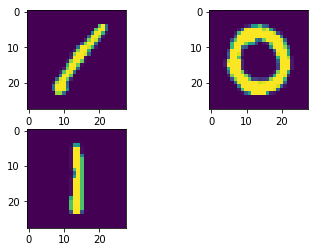

In [8]:
for i in range(0,3):
    plt.subplot(221+i)
    plt.imshow(X[i,:])

In [9]:
X = X.reshape(X.shape[0],28,28,1)
testX1 = testX1.reshape(testX1.shape[0],28,28,1)

In [10]:
meanX = X.mean().astype(np.float)
stdX = X.std().astype(np.float)

In [11]:
def standardize(x):
    return (x-meanX)/stdX
    

In [12]:
Y = pd.get_dummies(Y)

In [13]:
def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.1, shear_range=0.3,
                               height_shift_range=0.1, zoom_range=0.1)

In [15]:
batches = gen.flow(X, Y, batch_size=64)


In [16]:
model= get_bn_model()
model.optimizer.lr=0.01

In [17]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1)

Epoch 1/1
12786/42000 [========>.....................] - ETA: 15:55 - loss: 0.0602 - acc: 0.9824

In [18]:
predictions = model.predict_classes(testX1, verbose=0)


In [19]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})

In [20]:
submissions.to_csv("s2.csv", index=False, header=True)